In [2]:
from PIL import Image
#!pip install pytesseract
import pytesseract
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import nltk

In [3]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def extraire_texte(dossier):
    textes = []
    for nomfichier in os.listdir(dossier):
        if nomfichier.endswith('.jpg'):
            filepath = os.path.join(dossier, nomfichier)
            img = Image.open(filepath)
            
            text = pytesseract.image_to_string(img, lang='spa')
            textes.append(text)
    return textes

In [4]:
image_textes = extraire_texte('images')

In [5]:
annonces = [textes.lower().replace('\n', ' ') for textes in image_textes]

In [6]:
# Télécharger les stop words en espagnol avec nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Obtenir la liste des stop words en espagnol
spanish_stopwords = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thibaut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
vectorizer = TfidfVectorizer(stop_words=spanish_stopwords)
X = vectorizer.fit_transform(annonces)

In [11]:
# Application de l'algorithme K-Means, pour l'instant avec 3, nous rechercherons d'autres valeurs plus tard
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

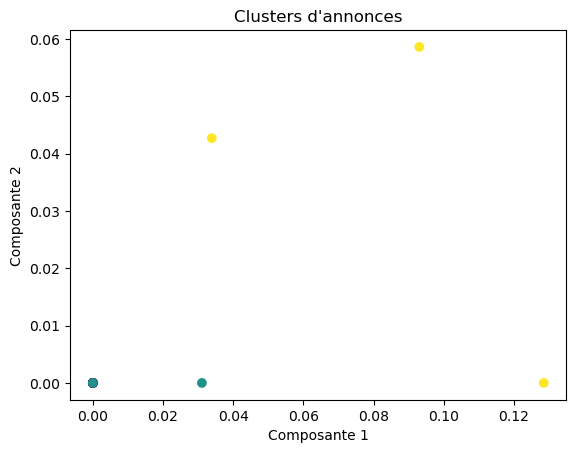

In [13]:
# Visualisation des clusters
plt.scatter(X.toarray()[:, 0], X.toarray()[:, 1], c=labels, cmap='viridis')
plt.title('Clusters d\'annonces')
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
plt.show()

In [15]:
# Comparaison de similarité
similarity_matrix = cosine_similarity(X)

In [17]:
# Afficher les annonces les plus similaires dans chaque cluster
for i in range(len(annonces)):
    most_similar = similarity_matrix[i].argsort()[-2]  # Deuxième annonce la plus similaire
    print(f"Annonce {i} est similaire à l'annonce {most_similar}")

Annonce 0 est similaire à l'annonce 11
Annonce 1 est similaire à l'annonce 11
Annonce 2 est similaire à l'annonce 11
Annonce 3 est similaire à l'annonce 2
Annonce 4 est similaire à l'annonce 3
Annonce 5 est similaire à l'annonce 1
Annonce 6 est similaire à l'annonce 11
Annonce 7 est similaire à l'annonce 8
Annonce 8 est similaire à l'annonce 7
Annonce 9 est similaire à l'annonce 1
Annonce 10 est similaire à l'annonce 3
Annonce 11 est similaire à l'annonce 2


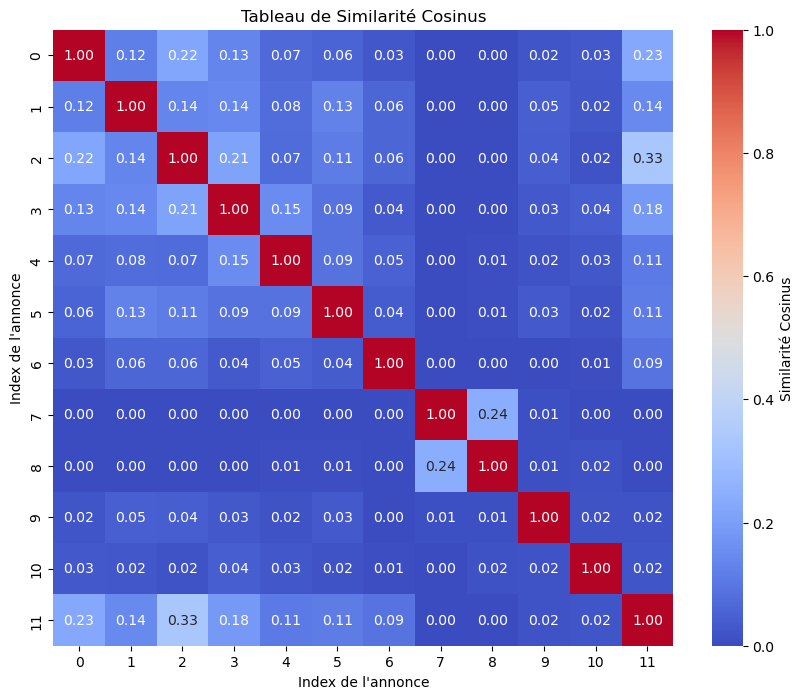

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assurez-vous que 'similarity_matrix' est votre matrice de similarité cosinus
# Créer un tableau de similarité coloré
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Similarité Cosinus'})
plt.title('Tableau de Similarité Cosinus')
plt.xlabel('Index de l\'annonce')
plt.ylabel('Index de l\'annonce')
plt.show()

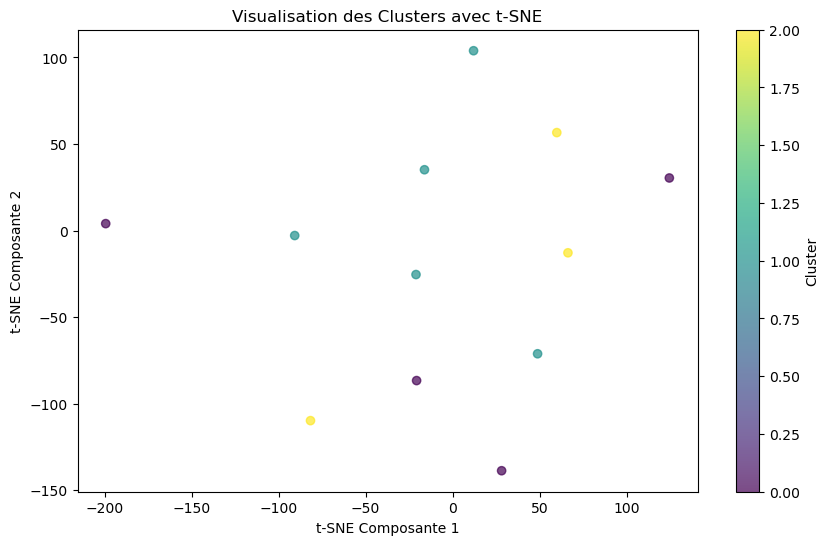

In [21]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


# Réduction de dimensionnalité avec t-SNE
# Ajustez la perplexité en fonction du nombre d'échantillons
n_samples = X.shape[0]
perplexity_value = min(30, n_samples - 1)

tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value, init='random')
X_tsne = tsne.fit_transform(X)

# Visualisation des clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title('Visualisation des Clusters avec t-SNE')
plt.xlabel('t-SNE Composante 1')
plt.ylabel('t-SNE Composante 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

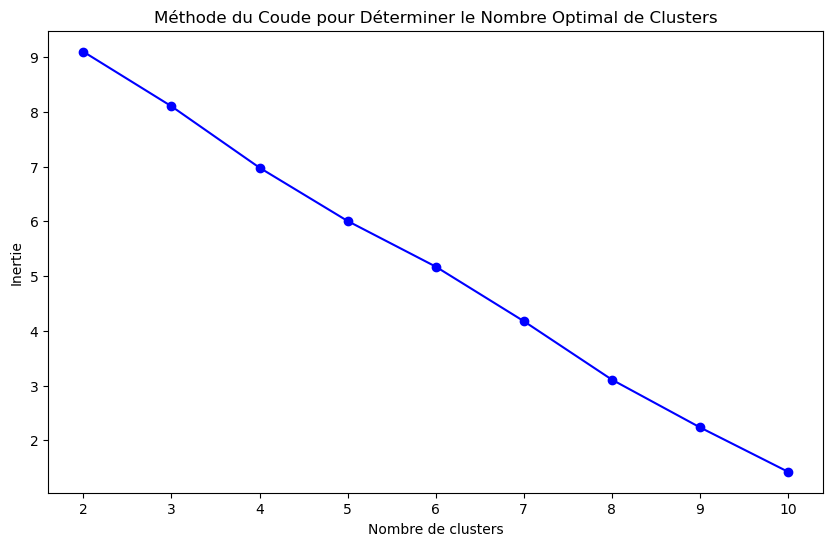

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Liste pour stocker les valeurs d'inertie
inertia = []

# Tester différentes valeurs de n_clusters
possible_clusters = range(2, 11)
for n in possible_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Tracer la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(possible_clusters, inertia, 'bo-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du Coude pour Déterminer le Nombre Optimal de Clusters')
plt.show()

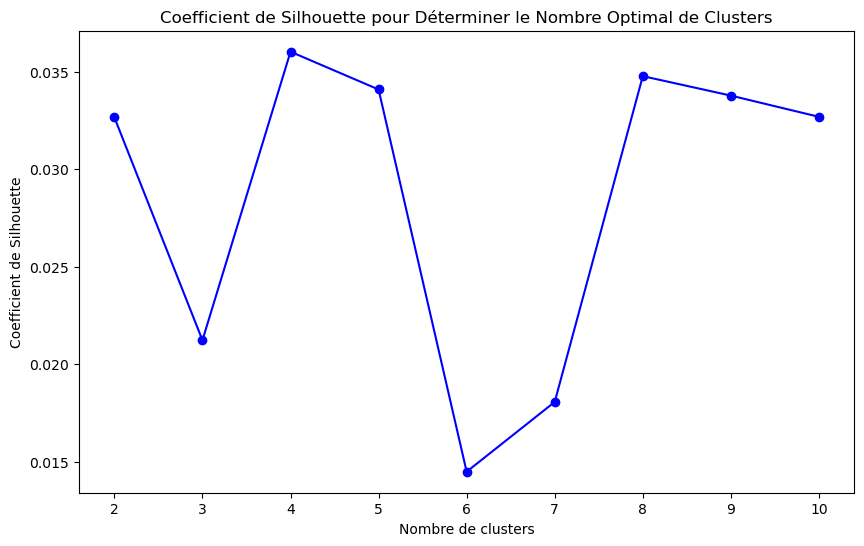

In [25]:
from sklearn.metrics import silhouette_score

# Liste pour stocker les valeurs de silhouette
silhouette_scores = []

# Tester différentes valeurs de n_clusters
for n in possible_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Tracer le coefficient de silhouette
plt.figure(figsize=(10, 6))
plt.plot(possible_clusters, silhouette_scores, 'bo-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Coefficient de Silhouette')
plt.title('Coefficient de Silhouette pour Déterminer le Nombre Optimal de Clusters')
plt.show()